# Lab 4 Image Registration

In this lab exercise, you will look at image registration using hand-picked selected features.

You are asked to write a short (no more than 2 pages) report of your work, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. 

In this exercise, we will be performing image registration on two different views of a fish embryo. To achieve the following steps need to be taken:

- Load in the two images:
    - fish-vis.tif (transmission image, visible light)
    - fish-cfp-#.tif (the floating image that is to be registered to the base image. This is a grey-level version of a fluorescence image with Cyan Fluorescent Protein - CFP)

- Use the existing skeleton code to find matching key points across the two images.
    - This may involve some trial and error of manually entering coordinates and updating the figure

- Perform transformation estimation using the estimated keypoints
- Register the two images using a warp function
- Display an overlayed image (blue and red) 

Example of overlay:

![Example image](example.png)

In [27]:

from skimage import io
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

# Load Images

img_vis = io.imread('./FishImageFiles/fish-vis.tif')# replace None
img_cfp = io.imread('./FishImageFiles/fish-cfp-2.tif')

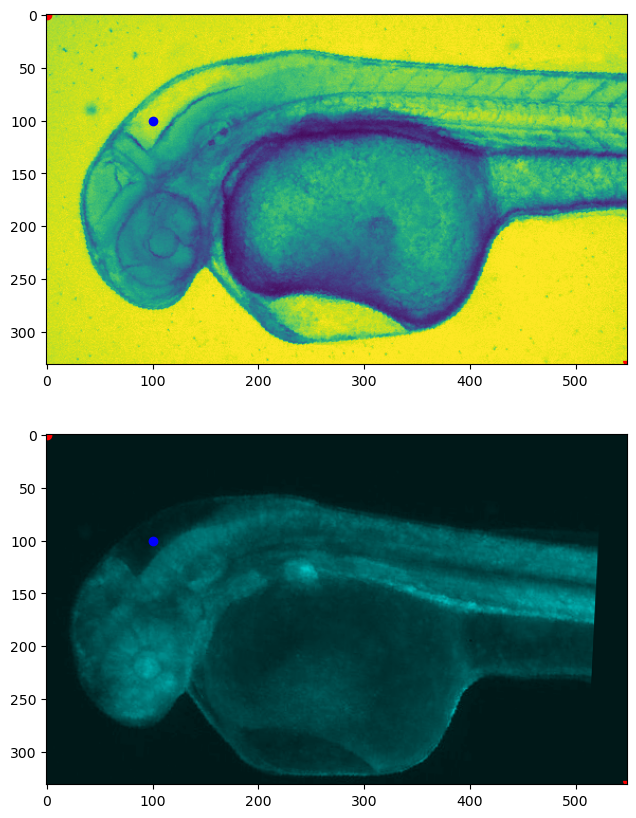

In [28]:
## Extract Keypoints

fig,axes = plt.subplots(2, 1,figsize=(10, 10))

#Fill in the key points array in the form as follows [[x1,y1],[x2,y2],[x3,y3]]
keypointsA = [[0,0],[100,100],[549,331]]
keypointsB = [[0,0],[100,100],[549,331]]

# Display the key points
symbols = ['ro','bo','rv','bv','r+','b+']
ax = axes.ravel()

for i in range(0,len(keypointsA)):
    ax[0].plot(keypointsA[i][0],keypointsA[i][1],symbols[i])
for i in range(0,len(keypointsB)):    
    ax[1].plot(keypointsB[i][0],keypointsB[i][1],symbols[i])

ax[0].imshow(img_vis)
ax[1].imshow(img_cfp)

(331, 549)
(331, 549)
[[0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]
 [0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]
 [0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]
 ...
 [0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]
 [0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]
 [0.07411765 0.07411765 0.07411765 ... 0.07411765 0.07411765 0.07411765]]
[[0.13333333 0.11764706 0.1372549  ... 0.07843137 0.08627451 0.0745098 ]
 [0.12941176 0.11764706 0.1254902  ... 0.08235294 0.06666667 0.07058824]
 [0.12156863 0.13333333 0.10588235 ... 0.05882353 0.08235294 0.07843137]
 ...
 [0.09803922 0.09411765 0.10196078 ... 0.01568627 0.0627451  0.04313725]
 [0.11372549 0.07058824 0.08627451 ... 0.05098039 0.02352941 0.05490196]
 [0.08235294 0.08235294 0.06666667 ... 0.05490196 0.0627451  0.05490196]]


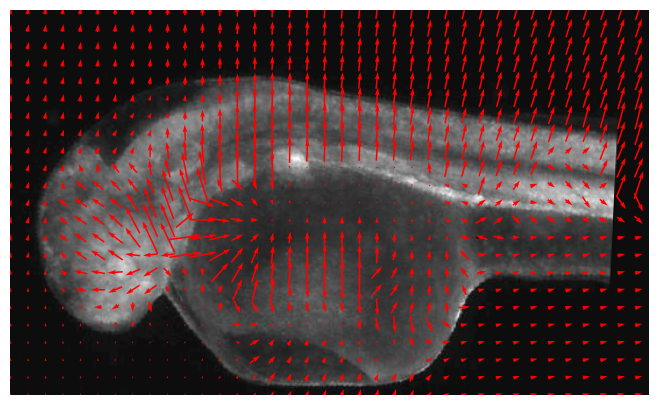

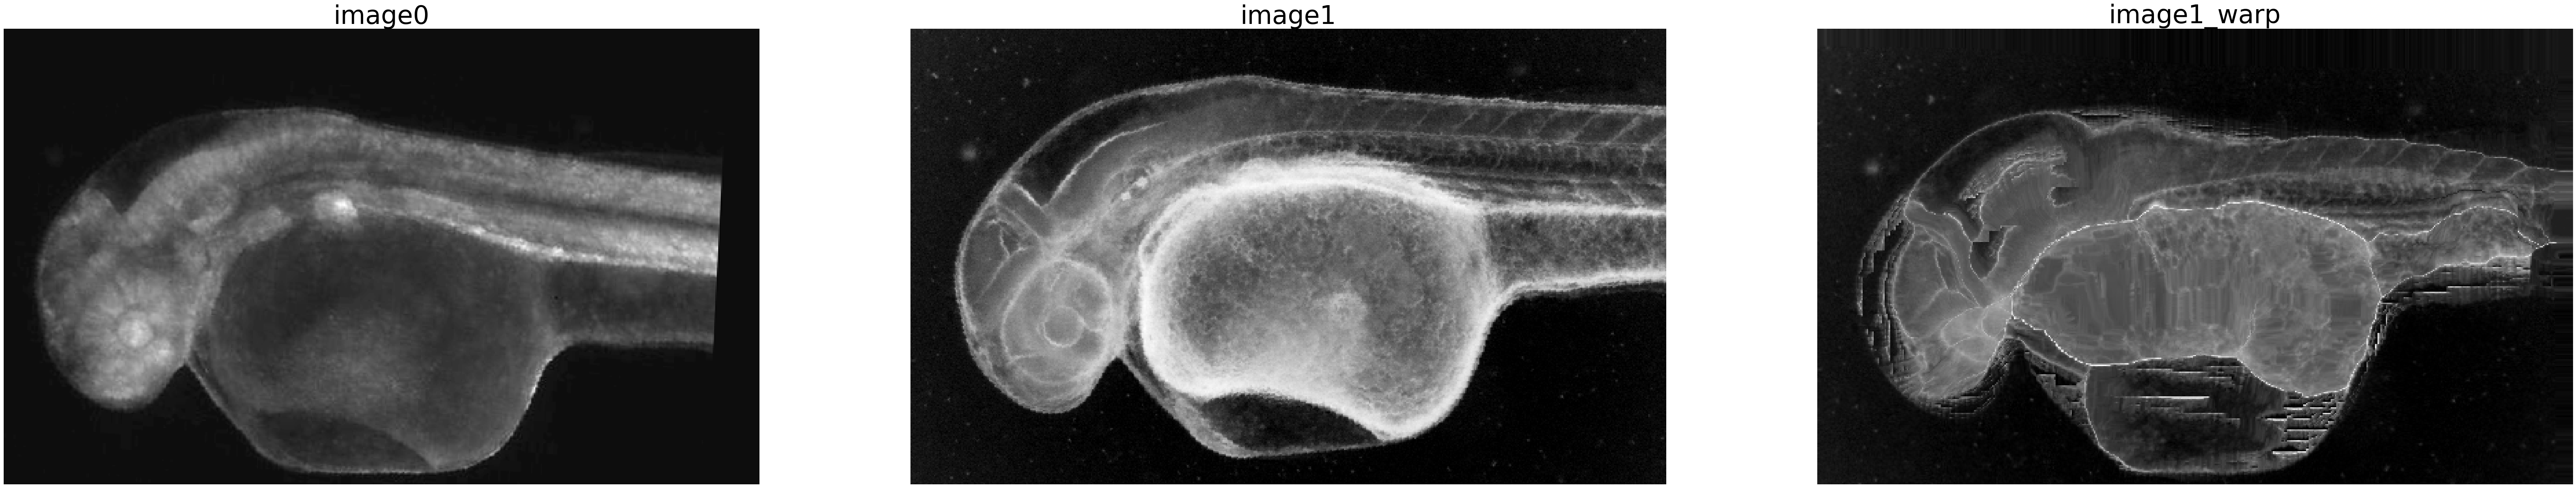

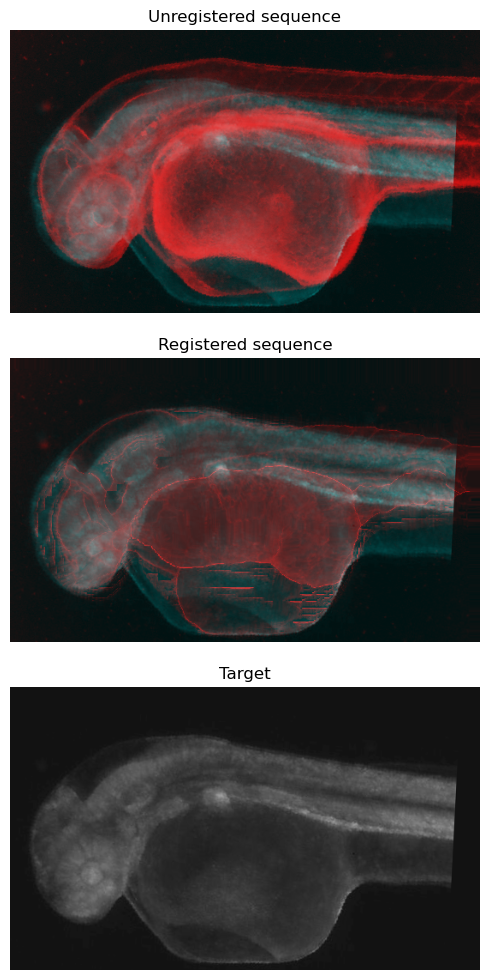

In [32]:

# Estimate the transform: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py


# Create the overlayed images: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py

#Ouput the overlayed images
import sys
# 添加utils.py所在的文件夹路径到sys.path
sys.path.append('../Lab2/')
from utils import create_subplots
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp, resize
from skimage.registration import optical_flow_tvl1, optical_flow_ilk





# --- Load the sequence
#image0, image1, disp = stereo_motorcycle()

# --- Convert the images to gray level: color is not supported.

image1 = img_vis
image0 = img_cfp 
# 获取两个图像的形状
shape0 = image0.shape[:2]  # 取前两个维度，即高度和宽度
shape1 = image1.shape[:2]

# 计算新的尺寸：这里我们选择两个图像中较小的尺寸
new_shape = (min(shape0[0], shape1[0]), min(shape0[1], shape1[1]))

# 调整两个图像的尺寸以匹配
image0 = resize(image0, new_shape)
image1 = resize(image1, new_shape)
image1 = image1 / np.max(image1)
image1 = 1.0 - image1
image0 = rgb2gray(image0)
# image1 = rgb2gray(image1)
print(image1.shape)
print(image0.shape)
print(image0)
print(image1)
# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape


# 可视化
Y, X = np.mgrid[0:nr, 0:nc]
# 可视化的步长，决定了箭头的稀疏程度
step = 15
# 创建一个新的图像用于可视化
plt.figure(figsize=(nc // 60, nr // 60))
plt.imshow(image0, cmap='gray')
# 绘制光流向量，这里使用了Y和X的步长来稀疏箭头
plt.quiver(X[::step, ::step], Y[::step, ::step],
           u[::step, ::step], -v[::step, ::step], color='r', pivot='middle')
plt.axis('off')
plt.show()
# 


row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]),
                   mode='edge')

fig, sub_figs = create_subplots(1,
                                3,
                                (30*3, 40),
                                [("image0",image0),
                                 ("image1",image1),
                                 ("image1_warp",image1_warp)],
                                50,
                                'gray')
plt.show()

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

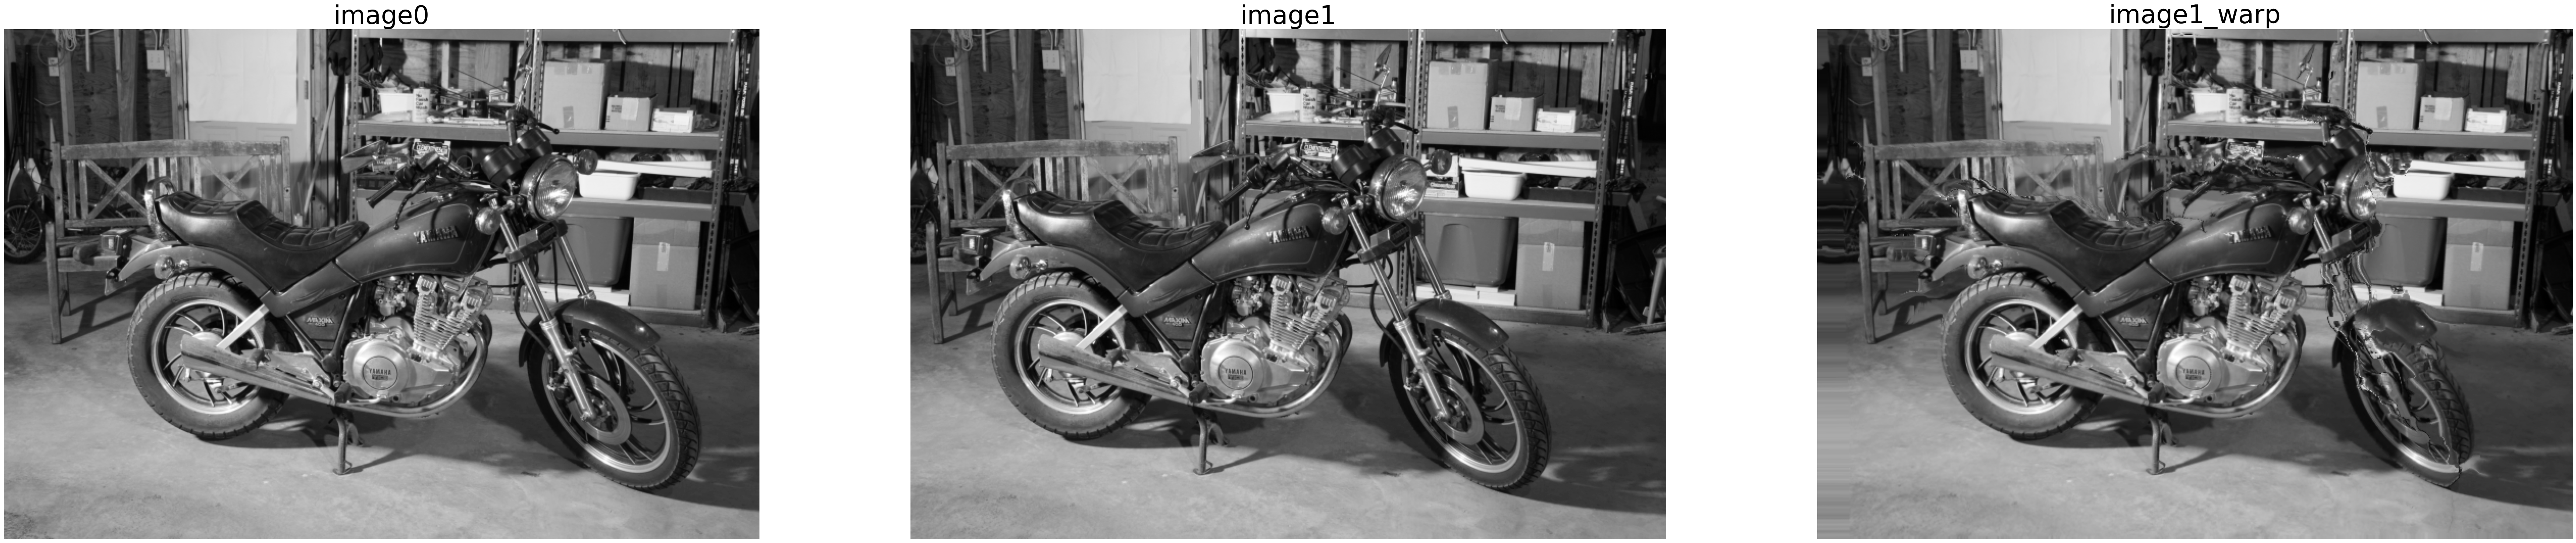

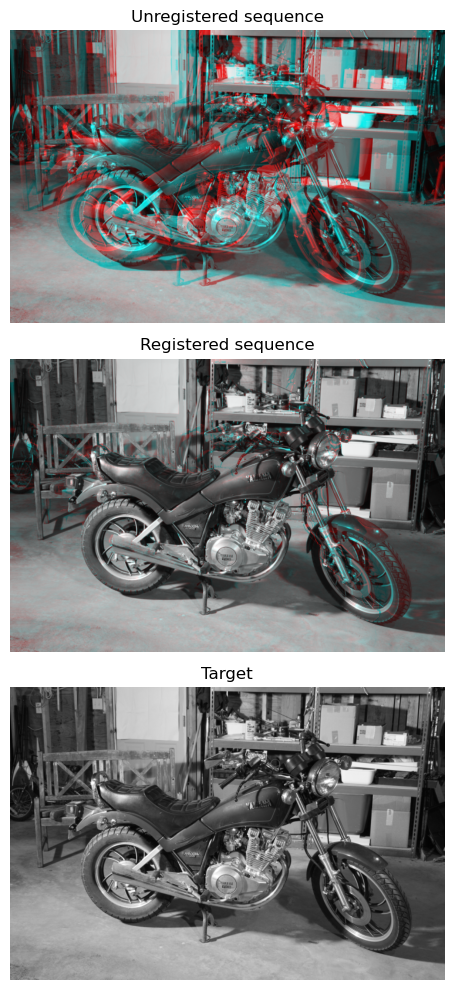

In [17]:
# --- Load the sequence
image0, image1, disp = stereo_motorcycle()

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]),
                   mode='edge')

fig, sub_figs = create_subplots(1,
                                3,
                                (30*3, 40),
                                [("image0",image0),
                                 ("image1",image1),
                                 ("image1_warp",image1_warp)],
                                50,
                                'gray')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

##### Question 1: What is the effect of increasing/decreasing the number of chosen control points in registration accuracy?

##### Question 2: How would you evaluate the accuracy of your registration?

##### Question 3: Other than Projective Transform, what are the other options and which one do you think works best?